# IMPORTING DATA

In [108]:
import pandas as pd  # used for data manipulation and data cleaning
import numpy as np   # can be used for array's
import glob
import seaborn as sb  # used for plotting great visualizations
import matplotlib.pyplot as plt   # Used for plot creatioins and some plots.

In [67]:
# importing all the files present in the path.

#https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe    -- source for thee code below.

path = r'C:\Users\RaviTeja\Desktop\Learnings_Materials_Certifications\case studies\Case_Study_cyclist_data\csv_files' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

In [68]:
df.head() # gettng the top 5 rows to see if the data is imported correctly

,ride_id,rideable_type,started_at,ended_at,Ride_time,Day_of_week,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E771D6B798F54371,docked_bike,03-06-2020 05:59,03-06-2020 06:11,00:11:17,4,Ashland Ave & Lake St,119,Walsh Park,628,41.885920,-87.667170,41.914610,-87.667968,member
1,B29C30CFA0072B25,docked_bike,03-06-2020 06:00,03-06-2020 06:03,00:03:25,4,Larrabee St & Webster Ave,144,Halsted St & Wrightwood Ave,349,41.921822,-87.644140,41.929143,-87.649077,member
2,90058C0761C4E45F,docked_bike,03-06-2020 06:00,03-06-2020 06:12,00:11:55,4,Halsted St & Dickens Ave,225,Clark St & Grace St,165,41.919936,-87.648830,41.950780,-87.659172,member
3,4AFF9415DF507565,docked_bike,03-06-2020 06:00,03-06-2020 06:13,00:12:52,4,Eckhart Park,86,Mies van der Rohe Way & Chicago Ave,173,41.896373,-87.660983,41.896910,-87.621743,member
4,6D14690F7A61AD88,docked_bike,03-06-2020 06:00,03-06-2020 06:32,00:31:30,4,Halsted St & Dickens Ave,225,Halsted St & Dickens Ave,225,41.919936,-87.648830,41.919936,-87.648830,casual


In [69]:
df.tail() # getting the last 5 rows to see the accuracy of the data.
# the data is imported perfectly.
# starts at June-2020 to may-2021

,ride_id,rideable_type,started_at,ended_at,Ride_time,Day_of_week,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
4073556,1C15BF0D39FD953B,electric_bike,31-05-2021 23:57,01-06-2021 00:06,00:09:03,2,NaN,NaN,NaN,NaN,41.980000,-87.670000,41.970000,-87.690000,member
4073557,CCDE5597E897FCED,electric_bike,31-05-2021 23:58,01-06-2021 00:11,00:13:10,2,Albany Ave & Bloomingdale Ave,15655,Damen Ave & Pierce Ave,TA1305000041,41.913945,-87.705213,41.909636,-87.677605,casual
4073558,2CF3BFB08088A143,classic_bike,31-05-2021 23:58,01-06-2021 00:03,00:05:08,2,Wilton Ave & Diversey Pkwy,TA1306000014,Racine Ave & Fullerton Ave,TA1306000026,41.932418,-87.652705,41.925563,-87.658404,member
4073559,6E7CF824593BCAA0,electric_bike,31-05-2021 23:58,01-06-2021 01:13,01:14:26,2,Wabash Ave & 9th St,TA1309000010,Wabash Ave & 9th St,TA1309000010,41.870627,-87.625694,41.870902,-87.625759,casual
4073560,94FDAB57751F30DE,classic_bike,31-05-2021 23:59,01-06-2021 01:09,01:10:21,2,Wabash Ave & 9th St,TA1309000010,Wabash Ave & 9th St,TA1309000010,41.870769,-87.625734,41.870769,-87.625734,casual


# DATA CLEANING

## Adding Multiple Columns to the dataset

In [71]:
# get the final dataset by reoving the columns -  start_station_name , start_station_id,end_station_name , end_station_id.

## df ----> the whole data with all the rows

cols = ["ride_id" , "rideable_type","started_at","ended_at" , "Ride_time","Day_of_week", "start_lat","start_lng","end_lat","end_lng","member_casual"]

# copying the required columns to df_1 and will have the data copied again to df_final .

df_1 = df[cols]    # df_1 ----> backup data with only the required columns.
df_1.head()

,ride_id,rideable_type,started_at,ended_at,Ride_time,Day_of_week,start_lat,start_lng,end_lat,end_lng,member_casual
0,E771D6B798F54371,docked_bike,03-06-2020 05:59,03-06-2020 06:11,00:11:17,4,41.885920,-87.667170,41.914610,-87.667968,member
1,B29C30CFA0072B25,docked_bike,03-06-2020 06:00,03-06-2020 06:03,00:03:25,4,41.921822,-87.644140,41.929143,-87.649077,member
2,90058C0761C4E45F,docked_bike,03-06-2020 06:00,03-06-2020 06:12,00:11:55,4,41.919936,-87.648830,41.950780,-87.659172,member
3,4AFF9415DF507565,docked_bike,03-06-2020 06:00,03-06-2020 06:13,00:12:52,4,41.896373,-87.660983,41.896910,-87.621743,member
4,6D14690F7A61AD88,docked_bike,03-06-2020 06:00,03-06-2020 06:32,00:31:30,4,41.919936,-87.648830,41.919936,-87.648830,casual


In [72]:
df_final = df_1.copy()      # df_final --> analysis will be performed using this variable.

In [74]:
# Getting the info of the data for datatypes
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4073561 entries, 0 to 4073560
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   ride_id        object 
 1   rideable_type  object 
 2   started_at     object 
 3   ended_at       object 
 4   Ride_time      object 
 5   Day_of_week    int64  
 6   start_lat      float64
 7   start_lng      float64
 8   end_lat        float64
 9   end_lng        float64
 10  member_casual  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 341.9+ MB


In [75]:
# started at Dtype is object --- should change to datetime.
# ended at Dtype is object --- should change to datetime.
# ride_time Dtype is object -- should chnage to time.

In [76]:
# Removing the data that has the ride_time in 'negative' as well as the data above '42 Hours'

df_final = df_final[(df_final['Ride_time'] > '0') & (df_final['Ride_time'] < '42:00:00')]

In [77]:
# Changing the data_type of the started_at column

df_final['started_at'] = pd.to_datetime(df_final['started_at'])

In [78]:
# Changing the data_type of the ended_at column

df_final['ended_at'] = df['ended_at'].astype('datetime64[ns]')

In [79]:
# Changing the data_type of the Ride_time column

df_final['Ride_time']  = pd.to_datetime(df_final['Ride_time'] , format = '%H:%M:%S')

In [80]:
# Adding a new column named - Ride_Length 


df_final['Ride_Length'] = df_final['ended_at'] - df_final['started_at']

In [81]:
df_final.info()

df_final.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4063225 entries, 0 to 4073560
Data columns (total 12 columns):
 #   Column         Dtype          
---  ------         -----          
 0   ride_id        object         
 1   rideable_type  object         
 2   started_at     datetime64[ns] 
 3   ended_at       datetime64[ns] 
 4   Ride_time      datetime64[ns] 
 5   Day_of_week    int64          
 6   start_lat      float64        
 7   start_lng      float64        
 8   end_lat        float64        
 9   end_lng        float64        
 10  member_casual  object         
 11  Ride_Length    timedelta64[ns]
dtypes: datetime64[ns](3), float64(4), int64(1), object(3), timedelta64[ns](1)
memory usage: 403.0+ MB


,ride_id,rideable_type,started_at,ended_at,Ride_time,Day_of_week,start_lat,start_lng,end_lat,end_lng,member_casual,Ride_Length
0,E771D6B798F54371,docked_bike,2020-03-06 05:59:00,2020-03-06 06:11:00,1900-01-01 00:11:17,4,41.885920,-87.667170,41.914610,-87.667968,member,00:12:00
1,B29C30CFA0072B25,docked_bike,2020-03-06 06:00:00,2020-03-06 06:03:00,1900-01-01 00:03:25,4,41.921822,-87.644140,41.929143,-87.649077,member,00:03:00
2,90058C0761C4E45F,docked_bike,2020-03-06 06:00:00,2020-03-06 06:12:00,1900-01-01 00:11:55,4,41.919936,-87.648830,41.950780,-87.659172,member,00:12:00
3,4AFF9415DF507565,docked_bike,2020-03-06 06:00:00,2020-03-06 06:13:00,1900-01-01 00:12:52,4,41.896373,-87.660983,41.896910,-87.621743,member,00:13:00
4,6D14690F7A61AD88,docked_bike,2020-03-06 06:00:00,2020-03-06 06:32:00,1900-01-01 00:31:30,4,41.919936,-87.648830,41.919936,-87.648830,casual,00:32:00


In [82]:
# Adding a new column named - Ride_Length_minute

df_final['Ride_Length_minute'] = (df_final['Ride_Length'].dt.total_seconds()/60).round(2)

In [83]:
# Removing the data with neagtive and greater than 1000 minutes from Ride_Length_minute.


df_final = df_final[(df_final['Ride_Length_minute'] > 0) & (df_final['Ride_Length_minute'] < 1000 )]

In [84]:
df_final.info()

df_final.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4007747 entries, 0 to 4073547
Data columns (total 13 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             object         
 1   rideable_type       object         
 2   started_at          datetime64[ns] 
 3   ended_at            datetime64[ns] 
 4   Ride_time           datetime64[ns] 
 5   Day_of_week         int64          
 6   start_lat           float64        
 7   start_lng           float64        
 8   end_lat             float64        
 9   end_lng             float64        
 10  member_casual       object         
 11  Ride_Length         timedelta64[ns]
 12  Ride_Length_minute  float64        
dtypes: datetime64[ns](3), float64(5), int64(1), object(3), timedelta64[ns](1)
memory usage: 428.1+ MB


,ride_id,rideable_type,started_at,ended_at,Ride_time,Day_of_week,start_lat,start_lng,end_lat,end_lng,member_casual,Ride_Length,Ride_Length_minute
0,E771D6B798F54371,docked_bike,2020-03-06 05:59:00,2020-03-06 06:11:00,1900-01-01 00:11:17,4,41.885920,-87.667170,41.914610,-87.667968,member,00:12:00,12.0
1,B29C30CFA0072B25,docked_bike,2020-03-06 06:00:00,2020-03-06 06:03:00,1900-01-01 00:03:25,4,41.921822,-87.644140,41.929143,-87.649077,member,00:03:00,3.0
2,90058C0761C4E45F,docked_bike,2020-03-06 06:00:00,2020-03-06 06:12:00,1900-01-01 00:11:55,4,41.919936,-87.648830,41.950780,-87.659172,member,00:12:00,12.0
3,4AFF9415DF507565,docked_bike,2020-03-06 06:00:00,2020-03-06 06:13:00,1900-01-01 00:12:52,4,41.896373,-87.660983,41.896910,-87.621743,member,00:13:00,13.0
4,6D14690F7A61AD88,docked_bike,2020-03-06 06:00:00,2020-03-06 06:32:00,1900-01-01 00:31:30,4,41.919936,-87.648830,41.919936,-87.648830,casual,00:32:00,32.0


In [85]:
# reating new columns for easy analysis.

type: object
from datetime import datetime as dt
from pandas.api.types import CategoricalDtype

day= {
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday'
} 

month= {
    1: 'Jan', 
    2: 'Feb', 
    3: 'Mar', 
    4: 'Apr',
    5: 'May', 
    6: 'Jun', 
    7: 'Jul', 
    8: 'Aug', 
    9: 'Sep', 
    10: 'Oct',
    11: 'Nov', 
    12: 'Dec'
}

df_final['Day'] = df_final['started_at'].dt.day
df_final['Month'] = df_final['started_at'].dt.month.map(month)
df_final['Year'] = df_final['started_at'].dt.year
df_final['Day_of_Week'] = df_final['started_at'].dt.dayofweek.map(day)

df_final.head()


,ride_id,rideable_type,started_at,ended_at,Ride_time,Day_of_week,start_lat,start_lng,end_lat,end_lng,member_casual,Ride_Length,Ride_Length_minute,Day,Month,Year,Day_of_Week
0,E771D6B798F54371,docked_bike,2020-03-06 05:59:00,2020-03-06 06:11:00,1900-01-01 00:11:17,4,41.885920,-87.667170,41.914610,-87.667968,member,00:12:00,12.0,6,Mar,2020,Friday
1,B29C30CFA0072B25,docked_bike,2020-03-06 06:00:00,2020-03-06 06:03:00,1900-01-01 00:03:25,4,41.921822,-87.644140,41.929143,-87.649077,member,00:03:00,3.0,6,Mar,2020,Friday
2,90058C0761C4E45F,docked_bike,2020-03-06 06:00:00,2020-03-06 06:12:00,1900-01-01 00:11:55,4,41.919936,-87.648830,41.950780,-87.659172,member,00:12:00,12.0,6,Mar,2020,Friday
3,4AFF9415DF507565,docked_bike,2020-03-06 06:00:00,2020-03-06 06:13:00,1900-01-01 00:12:52,4,41.896373,-87.660983,41.896910,-87.621743,member,00:13:00,13.0,6,Mar,2020,Friday
4,6D14690F7A61AD88,docked_bike,2020-03-06 06:00:00,2020-03-06 06:32:00,1900-01-01 00:31:30,4,41.919936,-87.648830,41.919936,-87.648830,casual,00:32:00,32.0,6,Mar,2020,Friday


In [86]:
# we have total rows of = 4073547
# we have total columns = 10
# All the data types are as expected. 

# ANALYZING DATA
### MEMBERS VS CASUAL RIDERS

##### Lets see the number of member riders vs casual riders.

In [88]:
member_casual = df_final.groupby("member_casual")['member_casual'].value_counts()
pd.DataFrame(member_casual)

,,member_casual
member_casual,member_casual,
casual,casual,1681889
member,member,2325858


Text(0.5, 1.0, 'Percentage of Members vs Casual riders')

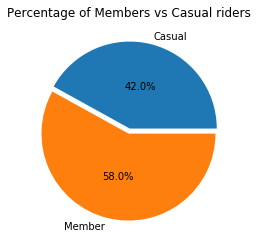

In [90]:

plt.pie(x=member_casual,labels = ['Casual','Member'],autopct="%.1f%%",explode=[0.03]*2, pctdistance=0.5)
plt.title("Percentage of Members vs Casual riders")

* The number of Members are relatively more than the number of casual riders in Cyclist.

#### Lets have a look at the mean of the Ride_Length in minutes for member vs casual rider.

In [91]:
mc_ride_time= df_final.groupby("member_casual")['Ride_Length_minute'].mean()
pd.DataFrame(mc_ride_time)

,Ride_Length_minute
member_casual,
casual,33.225122
member,15.081933


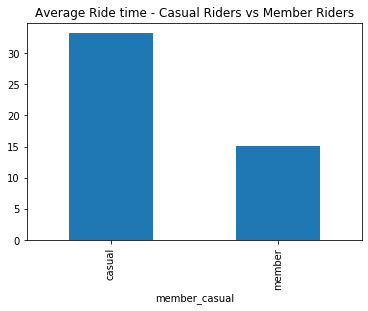

In [92]:
mc_ride_time.plot.bar(title = 'Average Ride time - Casual Riders vs Member Riders')

* Intrestingly, Even tough the number of causal riders are less than the member riders, The average ride time of the casual riders is way more than the member riders.

#### Number of Members VS Casual riders in a year.

In [93]:
# No.of Members VS Casual riders in a year.
month_count = df_final.groupby("member_casual")['Year'].value_counts()
pd.DataFrame(month_count)

Year
member_casual Year         
casual        2020  1183334
              2021   498555
member        2020  1596329
              2021   729529

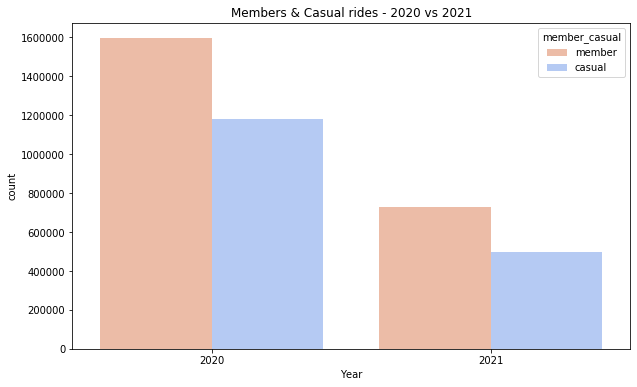

In [94]:
plt.figure(figsize = (10,6))
plt.title("Members & Casual rides - 2020 vs 2021")
sb.countplot(data = df_final , x = "Year" , hue = "member_casual",palette = 'coolwarm_r')

* There is a visible differnce in the number of riders from 2020 to 2021.
#### Note: Since the data contains only few months from each year cant totally rely on the year comparision.

##### Ride _length mean based on months - Member vs Casual Riders

* The ride length average for the casual riders is almost double when compared to the member riders in any given month.

In [100]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov","Dec"]
ride_len_mean = df_final.groupby(["member_casual" , "Month"])['Ride_Length_minute'].mean()
pd.DataFrame(ride_len_mean).reindex(index = months , level = 1)

Ride_Length_minute
member_casual Month                    
casual        Jan             30.523215
              Feb             32.491306
              Mar             31.828226
              Apr             30.266319
              May             31.971726
              Jun             38.631004
              Jul             39.618845
              Aug             34.903335
              Sep             30.871435
              Oct             26.429465
              Nov             29.282096
              Dec             29.810283
member        Jan             13.698303
              Feb             15.135799
              Mar             14.558606
              Apr             14.547530
              May             14.870654
              Jun             17.059612
              Jul             16.549657
              Aug             15.939428
              Sep             14.955400
              Oct             13.612797
              Nov             13.971971
              Dec             13.829728

* Lets compare the number of riders against the ride length in each month.

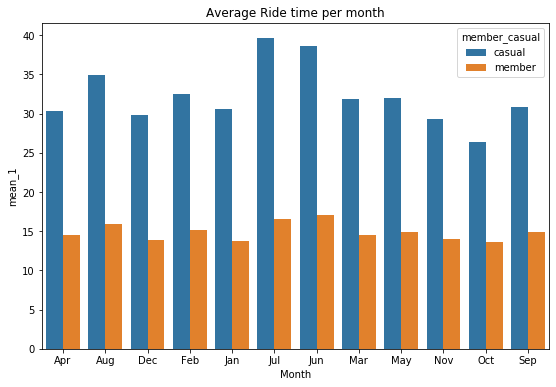

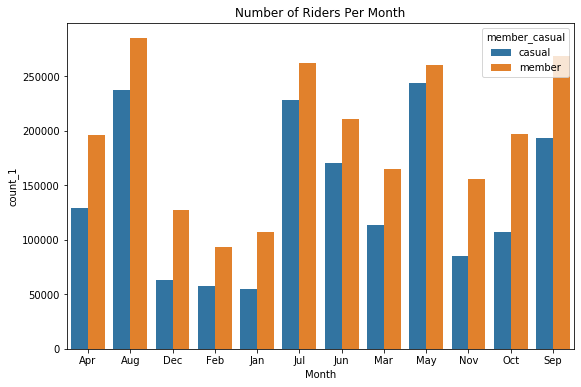

In [95]:

## ride length grouping
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov","Dec"]
ride_len_mean_1 = df_final.groupby(["member_casual" , "Month"]).agg(mean_1 = ('Ride_Length_minute' , 'mean'))
ride_len_mean_1 = ride_len_mean_1.reset_index()

## Number of riders grouping
no_riders_membercasual = df_final.groupby(["member_casual" , "Month"]).agg(count_1 = ('member_casual' , 'count'))
no_riders_membercasual = no_riders_membercasual.reset_index()
  
# subplot 1
plt.figure(figsize = (20,6))

plt.subplot(1,2,1)
plt.title("Average Ride time per month")
sb.barplot(x="Month",
           y="mean_1",
           hue="member_casual",
           data=ride_len_mean_1)
# subplot 2
plt.figure(figsize = (20,6))

plt.subplot(1,2,2)
plt.title("Number of Riders Per Month")
sb.barplot(x="Month",
           y="count_1",
           hue="member_casual",
           data=no_riders_membercasual)

* The Number of casual riders are always less than the member riders - Still casual riders ride length is way more than then.
###### Note: This viualization might be useful to get the casual riders to become member riders, As casual riders are riding more time and benifiting less than the member riders.

####  POPULAR RIDING MONTH - CASUAL VS MEMBER

In [98]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov","Dec"]
highest_month = df_final.groupby(["member_casual"])['Month'].value_counts()
pd.DataFrame(highest_month).reindex(index=months,level=1)

Month
member_casual Month        
casual        Jan     54534
              Feb     57854
              Mar    113341
              Apr    129435
              May    243296
              Jun    169861
              Jul    227810
              Aug    236757
              Sep    193598
              Oct    107415
              Nov     85400
              Dec     62588
member        Jan    107167
              Feb     93403
              Mar    164438
              Apr    195489
              May    260364
              Jun    210428
              Jul    261605
              Aug    284638
              Sep    268586
              Oct    197222
              Nov    155269
              Dec    127249

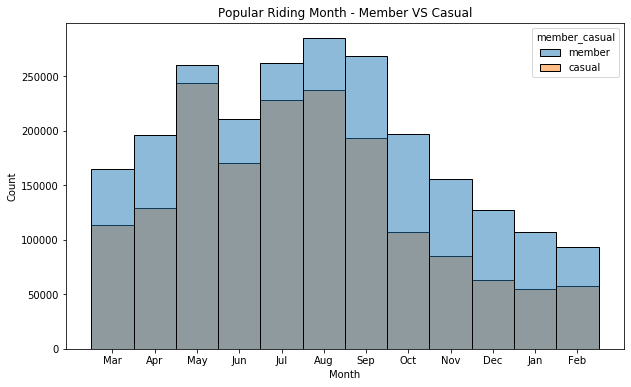

In [96]:
plt.figure(figsize = (10,6))
plt.title("Popular Riding Month - Member VS Casual")
sb.histplot(data = df_final , x = "Month" , hue = "member_casual")
#lets hasve a look at the traffic of the members as well as casual riders based on months.

* Popular month for member riders is - AUGUST.
* Popular month for Casual riders - MAY.

### POPULAR RIDING DAY - MEMBERS VS CASUALS

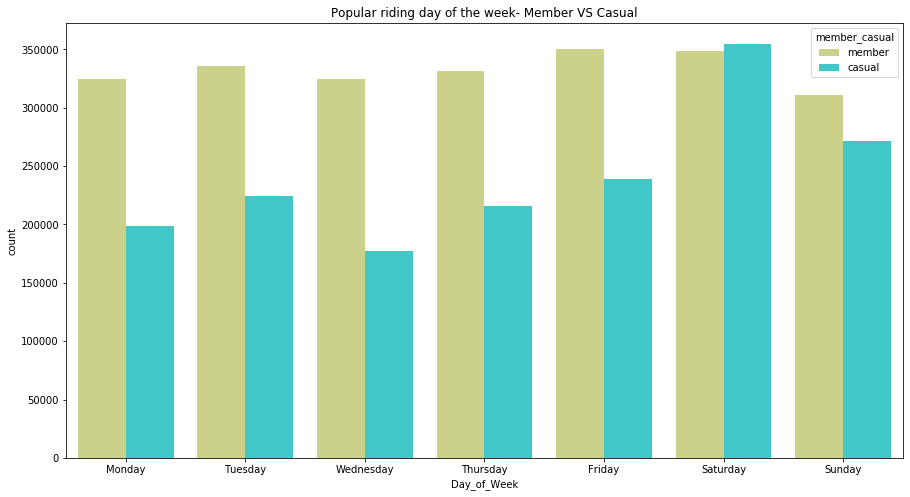

In [110]:
#lets hasve a look at the traffic of the members as well as casual riders based on days.
days_week = ['Monday' , 'Tuesday' , 'Wednesday' , 'Thursday' , 'Friday' , 'Saturday','Sunday'  ]
plt.figure(figsize = (15,8))
plt.title("Popular riding day of the week- Member VS Casual")
sb.countplot(data = df_final , x = "Day_of_Week" , hue = "member_casual",palette = 'rainbow_r' , order = days_week)

* usage is more on Weekends than weekdays.
* more Casual riders are accessing the cyclists services on saturday. Even more than member riders.

## RIBEABLE TYPE COMPARISIONS

### Most used Rideable_types

In [97]:
rideable_type = df_final.groupby("member_casual")['rideable_type'].value_counts()
pd.DataFrame(rideable_type)

rideable_type
member_casual rideable_type               
casual        docked_bike          1053906
              electric_bike         365451
              classic_bike          262532
member        docked_bike          1245889
              classic_bike          572119
              electric_bike         507850

Text(0.5, 1.0, 'Rideable Type - Members vs Casuals')

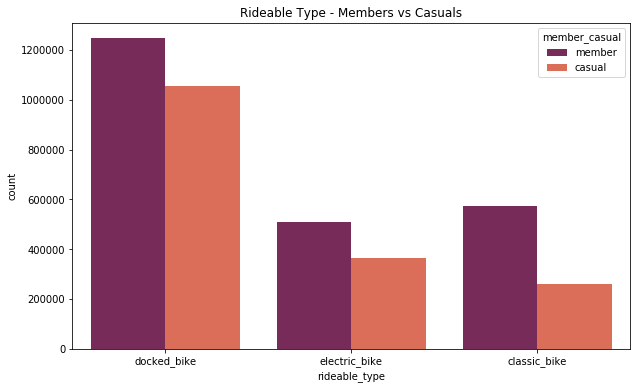

In [103]:


plt.figure(figsize = (10,6))

sb.countplot(data = df_final, x = "rideable_type"  , hue = 'member_casual' , palette = 'rocket')


plt.title('Rideable Type - Members vs Casuals')

* Most used is the - Docked_Bike.
* classic bike is the second highly used in member riders.
* electric_bike is the second most used in casual riders.

In [132]:
ride_mean = df_final.groupby(["member_casual" , "rideable_type"])["Ride_Length_minute"].mean()
pd.DataFrame(ride_mean)

Ride_Length_minute
member_casual rideable_type                    
casual        classic_bike            28.285417
              docked_bike             38.365078
              electric_bike           21.950833
member        classic_bike            14.173487
              docked_bike             16.102054
              electric_bike           13.602721

* The ride_length_minute for every rideable_type is almost double [just like ride_length for months]

### MOST USED RIDEABLE TYPE BASED ON DAY - MEMBER VS CASUAL

In [102]:
casual = df_final.loc[df_final['member_casual'] == 'casual']
member = df_final.loc[df_final['member_casual'] == 'member']

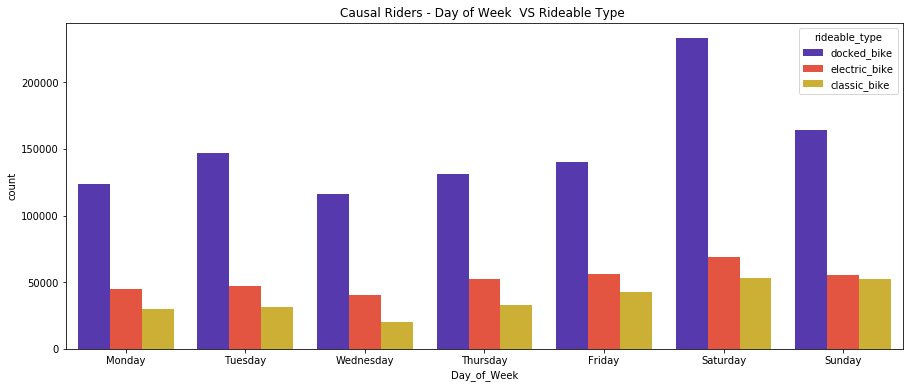

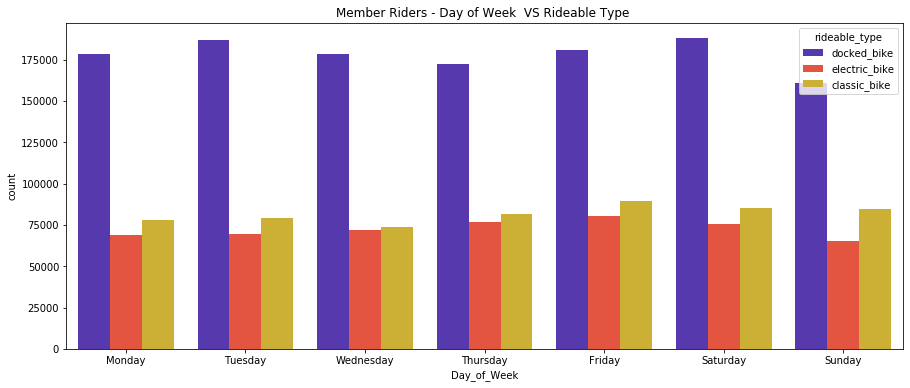

In [104]:
plt.figure(figsize = (15,6))
plt.title("Causal Riders - Day of Week  VS Rideable Type ")
sb.countplot(data = casual , x = "Day_of_Week" , hue = "rideable_type" , palette = "CMRmap" , order = days_week)

plt.figure(figsize = (15,6))
plt.title("Member Riders - Day of Week  VS Rideable Type ")
sb.countplot(data = member , x = "Day_of_Week" , hue = "rideable_type" , palette = "CMRmap" , order = days_week)


* Docked_bike the most used  - members & casuals.
* Classic bikes second most used  - members.
* electric_bikes second most used  - casuals.

### MOST USED RIDEABLE TYPE BASED ON MONTH - MEMBER VS CASUAL

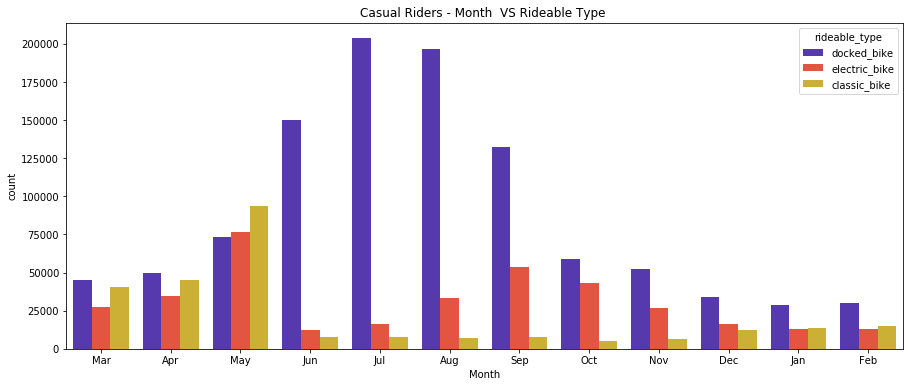

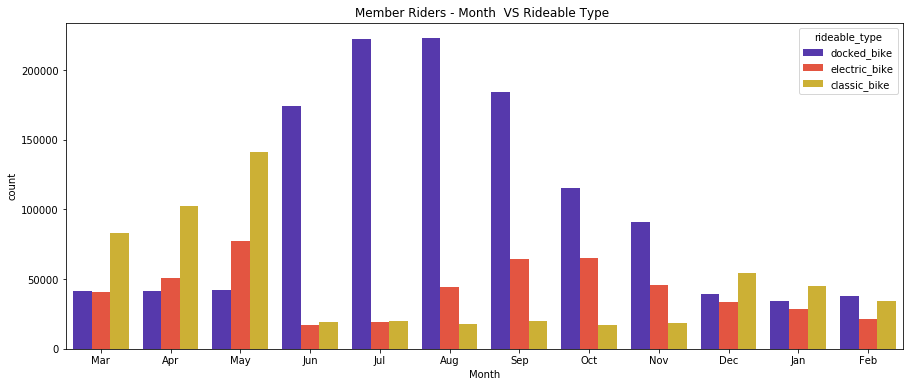

In [105]:
plt.figure(figsize = (15,6))
plt.title("Casual Riders - Month  VS Rideable Type ")
sb.countplot(data = casual , x = "Month" , hue = "rideable_type" , palette = "CMRmap")
plt.figure(figsize = (15,6))
plt.title("Member Riders - Month  VS Rideable Type ")
sb.countplot(data = member , x = "Month" , hue = "rideable_type" , palette = "CMRmap" )


#### Most Used
* Docked bike- is the most used for almost all months - members and casuals both.

#### Second most used
* Classic bike most prefered in the months "MARCH*" , "APRIL*" , "MAY*" , "DECEMBER" , "JAMUARY" by Member riders.
* Not much intresting in the casual riders side.

* mostly JUNE , JULY , AUGUST have a peak in the riders for docked_bikes.


### MOST USED RIDEABLE TYPE BASED ON MONTH - MEMBER VS CASUAL

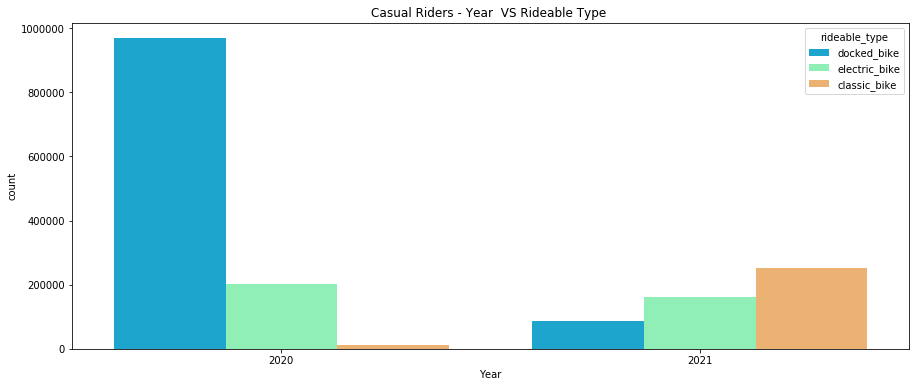

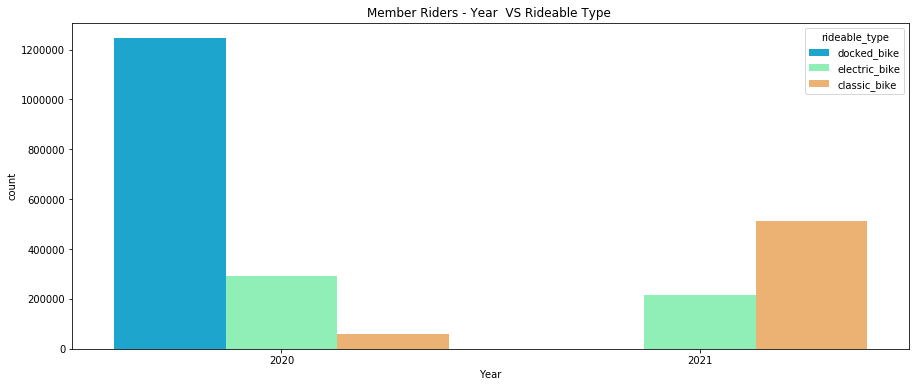

In [106]:
plt.figure(figsize = (15,6))
plt.title("Casual Riders - Year  VS Rideable Type ")
sb.countplot(data = casual , x = "Year" , hue = "rideable_type" , palette = "rainbow")
plt.figure(figsize = (15,6))
plt.title("Member Riders - Year  VS Rideable Type ")
sb.countplot(data = member , x = "Year" , hue = "rideable_type" , palette = "rainbow")


* Classic bike are booming in 2021 
* docked_bikes are more used by casual riders than members.

#### Note: the data is only upto MAY so cant conclude.

# CONCLUSION

#### Done the comparision between Member Riders and casual Riders, and found many differences and intresting trends.

#### Why would casual riders buy Cyclistic annual memberships?
* The Casual_riders AVERAGE ride_length is more than the Member_riders. We can use this to get the casual riders signup for the membership, Where they can be benifited more than the mmeber_riders.

* June , July and August Average ride lengths of the causual_riders are more than the overall year. Can add small offers to get them to signup for membership at Cyclist.

* Anouncing that members can have offers on Weekends can attract casuals as more casuals are riding on weekdays than weekends.

* Should focus on casual riders on months May,July and August as the usage is on peaks in that months

#### How can Cyclistic use digital media to influence casual riders to become members?

* Cyclist can push notifications to become a memebr of Cyclist to casual riders on the months of MAY, JULY and AUGUST as the usage is peak on those months.

* Should show how casual riders are missing out on membership features by showing the casual vs membership differences. 

* Can add small offers in the month June , July and August as the  Average ride_lengths of the causual_riders are more in those months and members aswell.